In [1]:
import pandas as pd
import numpy as np
import nltk
import re #Regular expressions
import matplotlib.pyplot as plt
import seaborn as sns #Plotting properties
# from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer #Data transformation
from sklearn.linear_model import LogisticRegression #Prediction Model
from sklearn.metrics import accuracy_score #Comparison between real and predicted
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# to generate word cloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [2]:
# Load the dataset Trainig and validation data sets
df_train = pd.read_csv('twitter_training.csv') 
df_val = pd.read_csv('twitter_validation.csv')



# Explore the data
df_train.head()
df_val.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [3]:
# Training data set
df_train.columns=['id', 'Topic', 'Impression', 'Text']
df_train.head()

,id,Topic,Impression,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
# Validation data set
df_val.columns=['id', 'Topic', 'Impression', 'Text']
df_val.head()

,id,Topic,Impression,Text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


To prepare the data for the text analysis an additional row was created using the method of str.lower. However, as there were some texts with only numerical values (such as one that only had a 2 as the tweet) an additional function was used for transforming all the data to string.

Then, a regex expression erased the special characters as it is common to have digitation problems on Twitter.

In [46]:
#Text transformation
# First step is to remove single letter words
def remove_single_double_letters(text):
    #Define a regular expression pattern to match single and double letters
    pattern = r'\b[a-zA-Z]{1,2}\b'  # Matches words with 1 or 2 alphabetic characters
    
    # Use re.sub() to replace matched patterns with an empty string
    cleaned_text = re.sub(pattern, '', text)
    
    return cleaned_text

df_train["lower"]=df_train.Text.str.lower() #lowercase
df_train["lower"]=[str(data) for data in df_train.lower] #converting all to string
df_train["lower"]=df_train.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex
df_train['lower'] = df_train['lower'].apply(remove_single_double_letters)
df_val["lower"]=df_val.Text.str.lower() #lowercase
df_val["lower"]=[str(data) for data in df_val.lower] #converting all to string
df_val["lower"]=df_val.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex
df_val['lower'] = df_val['lower'].apply(remove_single_double_letters)


The differences between the two text columns are presented in the next table.

In [47]:
# Description of the validation dataset
df_val.head()

,id,Topic,Impression,Text,lower
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft why pay for word when functions ...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking full closet hacking tr...
3,4433,Google,Neutral,Now the President is slapping Americans in the...,now the president slapping americans the fac...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,eahelp had madeleine mccann cellar for t...


In [48]:
# Description of the training dataset
df_train.head()

,id,Topic,Impression,Text,lower
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming the borders and will kill you all
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,getting borderlands and will kill you all
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,coming borderlands and will murder you all
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,getting borderlands 2 and will murder you ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,getting into borderlands and can murder you ...


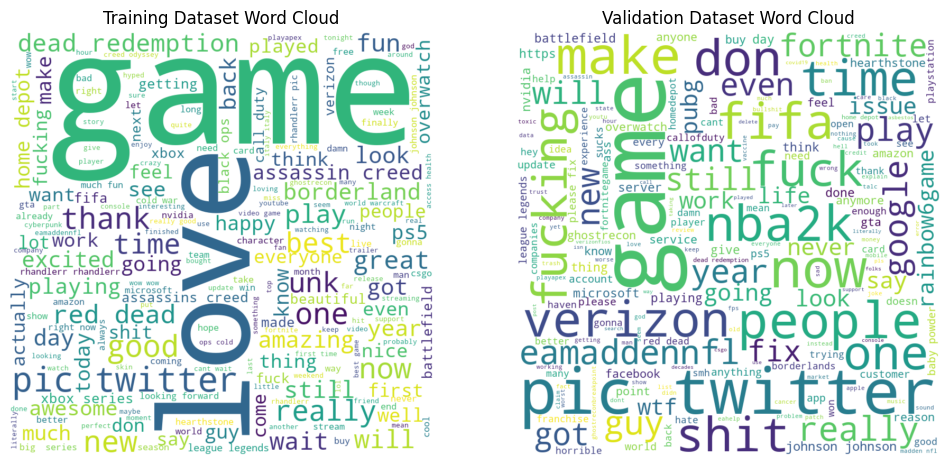

In [49]:
# Create a word cloud for the training dataset
train_text = ' '.join(df_train[df_train["Impression"]=="Positive"].lower)
wordcloud_train = WordCloud(width=800, height=800, background_color='white').generate(train_text)

# Create a word cloud for the validation dataset
valid_text = ' '.join(df_val[df_val["Impression"]=="Negative"].lower)
wordcloud_valid = WordCloud(width=800, height=800, background_color='white').generate(valid_text)

# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_train, interpolation='bilinear')
plt.title('Training Dataset Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_valid, interpolation='bilinear')
plt.title('Validation Dataset Word Cloud')
plt.axis('off')

plt.show()

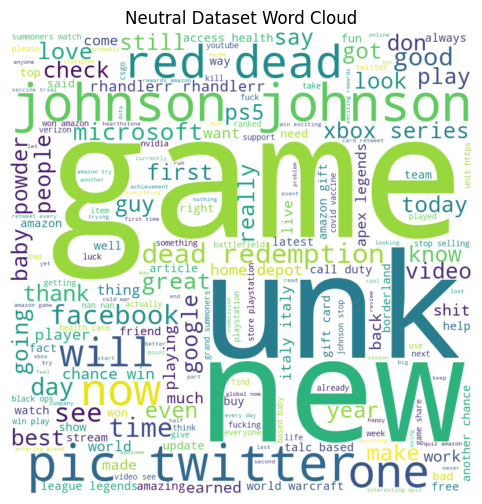

In [50]:
# Create a word cloud for neutral dataset
train_text = ' '.join(df_train[df_train["Impression"]=="Neutral"].lower)
wordcloud_train = WordCloud(width=800, height=800, background_color='white').generate(train_text)

plt.figure(figsize= (12, 6))
plt.imshow(wordcloud_train, interpolation='bilinear')
plt.title('Neutral Dataset Word Cloud')
plt.axis('off')

plt.show()

As to identify the main words that were used per label, a word_cloud was used to see which are the most important words on the train data. For example, on the positive label words such as love and game were mostly used alongside a wide variety of words classified as "good sentiments".

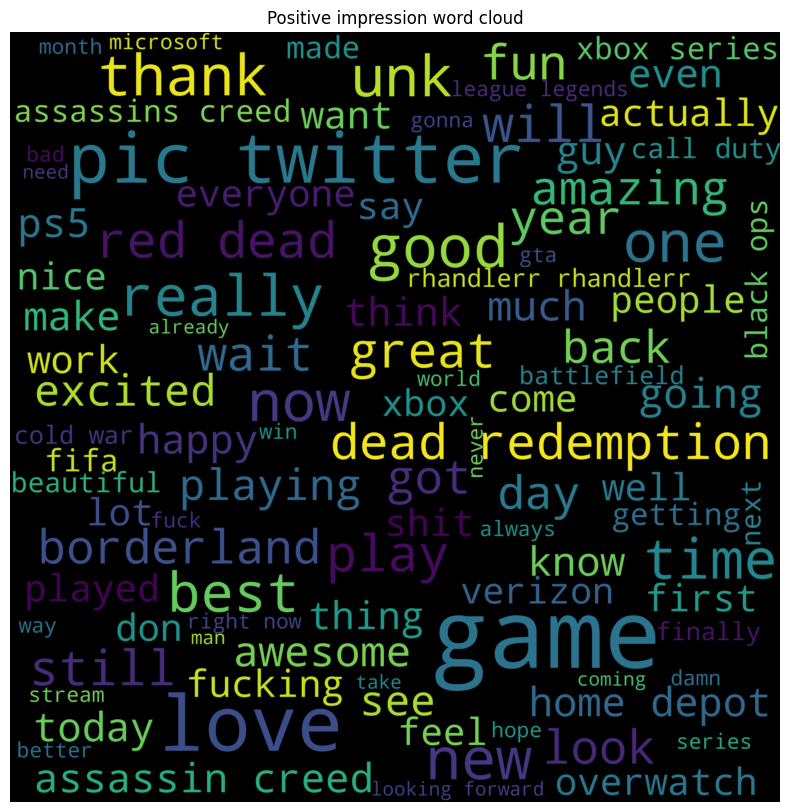

In [51]:
# Create a word cloud for positive impressions
word_cloud_text = ''.join(df_train[df_train["Impression"]=="Positive"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.title('Positive impression word cloud')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

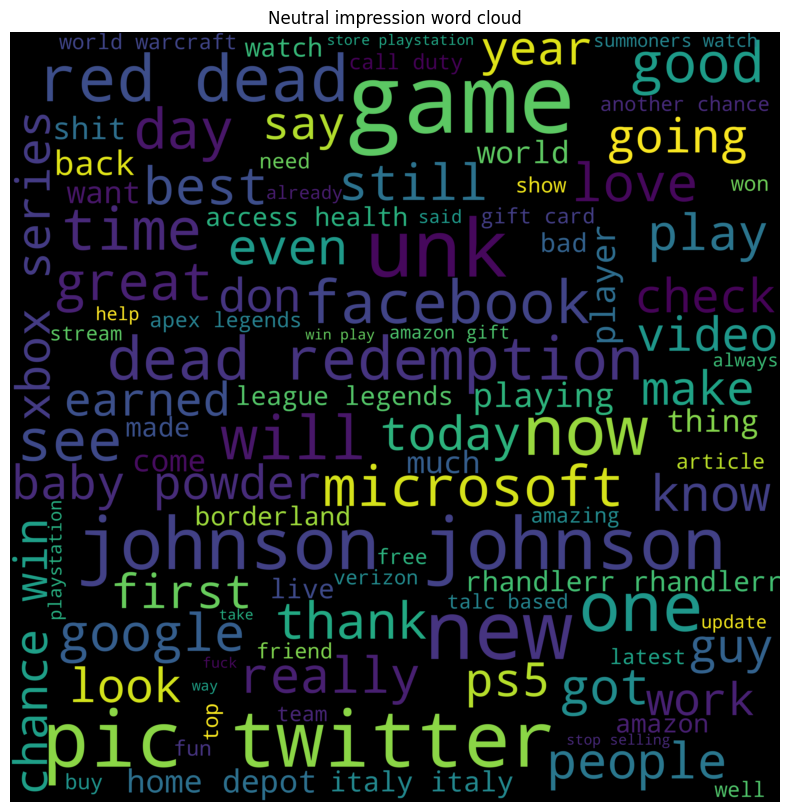

In [52]:
# Create a wordcloud for neutral expressions
word_cloud_text = ''.join(df_train[df_train["Impression"]=="Neutral"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.title('Neutral impression word cloud')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

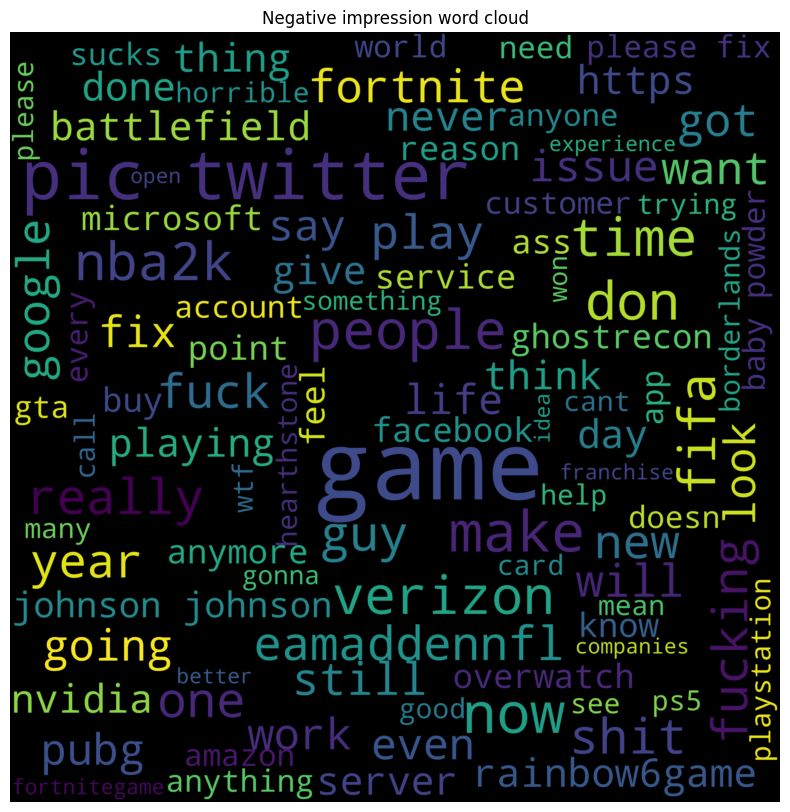

In [53]:
# Create a word cloud for negative expressions
word_cloud_text = ''.join(df_val[df_val["Impression"]=="Negative"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.title('Negative impression word cloud')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [54]:

df_train.info() # check for information about the train data set
df_train.isnull().sum() #check for columns with no data
df_val.isnull().sum() #check for columns with no data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          74681 non-null  int64 
 1   Topic       74681 non-null  object
 2   Impression  74681 non-null  object
 3   Text        73995 non-null  object
 4   lower       74681 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.8+ MB


id            0
Topic         0
Impression    0
Text          0
lower         0
dtype: int64

In [55]:
df_train.isnull().sum() #after no text samples are dropped

id              0
Topic           0
Impression      0
Text          686
lower           0
dtype: int64

In [56]:
#Count topic per category
plot1=df_train.groupby(by=["Topic","Impression"]).count().reset_index()
plot1.head()

#After no text samples are dropped, data is unified as the id matches the unified text. shows ID is unique

,Topic,Impression,id,Text,lower
0,Amazon,Irrelevant,192,186,192
1,Amazon,Negative,576,575,576
2,Amazon,Neutral,1236,1207,1236
3,Amazon,Positive,312,308,312
4,ApexLegends,Irrelevant,192,192,192


The number of modified texts coincides with the id. For this reason, as the ID is unique, the following barplot shows that for games such as MaddenNFL and NBA2K the number of negative tweets is the highest while on the other brands the trend is different.

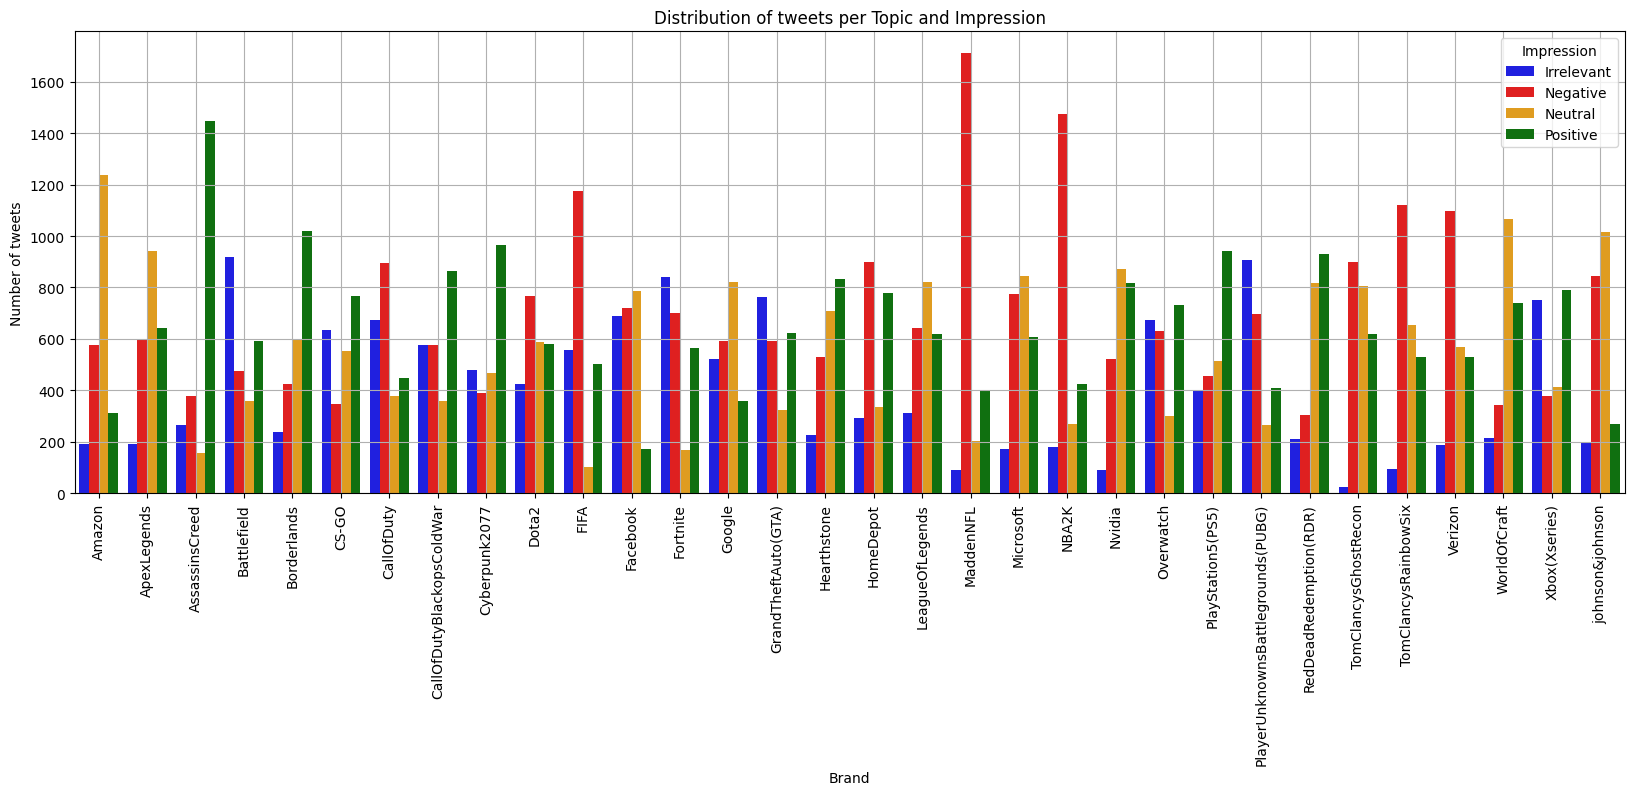

In [57]:
# Chart showing different topics and their impressions 
# Define a custom color palette for impressions
impression_colors = {"Positive": "green", "Negative": "red", "Irrelevant" : "blue", "Neutral":"orange"}

plt.figure(figsize=(20,6))
sns.barplot(data=plot1,x="Topic",y="id",hue="Impression", palette = impression_colors)
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Topic and Impression");
# we can see at a glance that the topics with the highest negative impressions are maddennfl and nba2k

In [58]:
df_train.columns

Index(['id', 'Topic', 'Impression', 'Text', 'lower'], dtype='object')

With the clean text and single word text removed, the initial number of unique tokens was counted to identify the model complexity. As presented, there are now about 30 thousand unique words.

In [59]:
# Tokenize each text element in the 'train_data' DataFrame
tokens_text = [ word_tokenize(text.upper()) for text in df_train['lower']]  # Replace 'column_name' with the actual column containing text data

# Flatten the list of tokens
tokens_flat = [item for sublist in tokens_text for item in sublist]

# Count the number of unique tokens (words)
unique_word_count = len(set(tokens_flat))

#print("Number of tokens: ", len(tokens_flat))
print("Number of unique words: ", unique_word_count)


Number of unique words:  29968


In [60]:
tokens_text[1]

['GETTING', 'BORDERLANDS', 'AND', 'WILL', 'KILL', 'YOU', 'ALL']

In [78]:
#Choosing english stopwords cos dataset is in english
# stopwords should be excluded from the analysis
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

For the main regression model, it was used a simple Logistic Regression of the sklearn library alongside the Bag of Words (BoW) approach. This method helps to classify and group the relevant data to help the model identify the proper trends.

On this first BoW, the stopwords were considered alongside a default ngram of 1.

In [62]:
#logistic regression model with bag of words approach
#Initial Bag of Words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, #English Stopwords
    ngram_range=(1, 1) #analysis of one word
)

In [63]:
# the main data was split on train and test datasets alongside the encoding of the words by using the training dataset as a reference
#Train - Test splitting
reviews_train, reviews_test = train_test_split(df_train, test_size=0.2, random_state=0)

In [64]:
reviews_train

,id,Topic,Impression,Text,lower
27749,1179,AssassinsCreed,Positive,I genuinely wish more companies would do this ...,genuinely wish more companies would this out...
22415,4237,CS-GO,Neutral,today i carried my whole team in @PlayVALORANT...,today carried whole team playvalorant and ...
44208,10395,PlayerUnknownsBattlegrounds(PUBG),Positive,"Good news!, pubg will unban in India.. pic.twi...",good news pubg will unban india pic twitter...
71736,11089,TomClancysGhostRecon,Negative,@ GhostRecon _ UK cannot be played because no ...,ghostrecon cannot played because charac...
41144,1461,Battlefield,Neutral,The Russian systems are becoming Battlefield 1,the russian systems are becoming battlefield 1
...,...,...,...,...,...
21243,4037,CS-GO,Positive,Help give me someday win through this awesome ...,help give someday win through this awesome ...
45891,11877,Verizon,Neutral,This comes as Facebook currently faces major p...,this comes facebook currently faces major pub...
42613,10111,PlayerUnknownsBattlegrounds(PUBG),Irrelevant,@ PUBGMOE (my game ID is 5176547049 and ORCpre...,pubgmoe game 5176547049 and orcpreda w...
43567,10279,PlayerUnknownsBattlegrounds(PUBG),Irrelevant,"I've just finished my second YouTube video, I ...",just finished second youtube video love d...


In [65]:
#Creation of encoding related to train dataset
X_train_bow = bow_counts.fit_transform(reviews_train.lower)

#Transformation of test dataset with train encoding
X_test_bow = bow_counts.transform(reviews_test.lower)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  % sorted(inconsistent)


In [66]:
#Labels for train and test encoding
y_train_bow = reviews_train['Impression']
y_test_bow = reviews_test['Impression']

The total number of tweets for each category shows that negative and positive are the most registered while the irrelevant is the lowest.

In [67]:
#Total of registers per category
y_test_bow.value_counts() / y_test_bow.shape[0]

Negative      0.301399
Positive      0.281717
Neutral       0.244895
Irrelevant    0.171989
Name: Impression, dtype: float64

In [68]:
# Logistic regression model 1
model1 = LogisticRegression(C=1, solver="liblinear",max_iter=200)
model1.fit(X_train_bow, y_train_bow)
# Prediction
test_pred = model1.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)

Accuracy:  83.20278503046127


In [69]:
#Validation data
X_val_bow = bow_counts.transform(df_val.lower)
y_val_bow = df_val['Impression']
X_val_bow

<999x28604 sparse matrix of type '<class 'numpy.int64'>'
	with 12338 stored elements in Compressed Sparse Row format>

In [70]:
Val_res = model1.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_res) * 100)

Accuracy:  93.3933933933934


With this data, the Logistic Regression Model was trained, where accuracy of 83% on the test dataset was obtained while on the validation dataset this value increased to 93%.

In [71]:
#n-gram of 4 words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    ngram_range=(1,4)
)
#Data labeling
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
X_test_bow = bow_counts.transform(reviews_test.lower)
X_val_bow = bow_counts.transform(df_val.lower)
X_train_bow

<59744x1218020 sparse matrix of type '<class 'numpy.int64'>'
	with 3183816 stored elements in Compressed Sparse Row format>

In [72]:
model2 = LogisticRegression(C=1, solver="liblinear",max_iter=1000)
# Logistic regression
model2.fit(X_train_bow, y_train_bow)
# Prediction
test_pred_2 = model2.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_2) * 100)

Accuracy:  90.23900381602732


In [73]:
y_val_bow = df_val['Impression']
Val_pred_2 = model2.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_pred_2) * 100)

Accuracy:  98.5985985985986


Finally, another Bag of Words was used. This had an n-gram of 4 while not classifying the stopwords, using all the available information.

The Test dataset got to 90% while on the validation data the accuracy was 98%, showing that this approach was better than the simple n-gram and stopwords model. 

this new model would be used for further predictions.

In [74]:
tokens_text[1]

['GETTING', 'BORDERLANDS', 'AND', 'WILL', 'KILL', 'YOU', 'ALL']

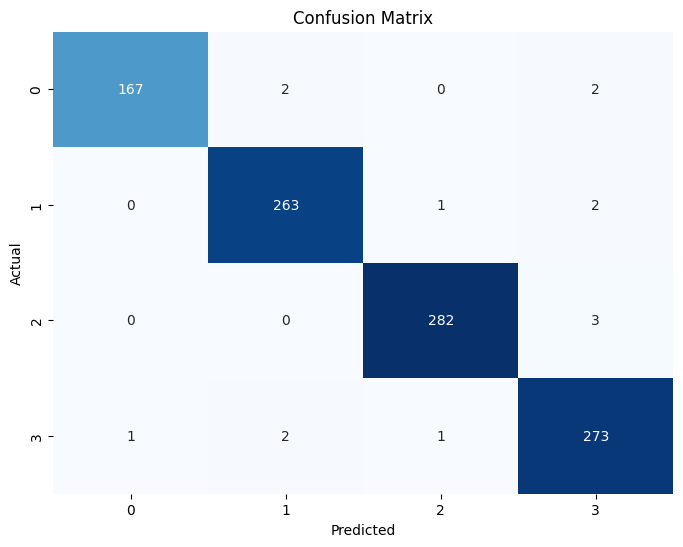

In [75]:
conf_matrix = confusion_matrix(y_val_bow, Val_pred_2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


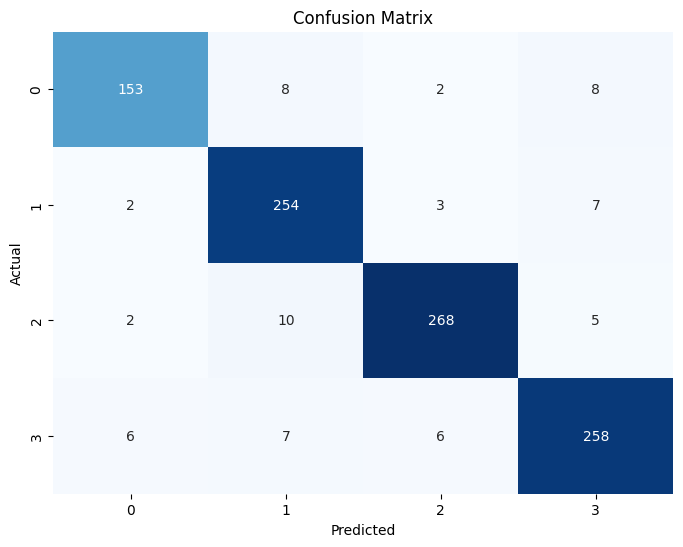

In [76]:
conf_matrix = confusion_matrix(y_val_bow, Val_res)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [77]:
# Predict the sentiment of new text using trained model
new_text = ["I loved the product", "The service was terrible", "not there"]

X_val_bow = bow_counts.transform(pd.Series(new_text).str.lower())

new_pred = model2.predict(X_val_bow)

new_pred

array(['Positive', 'Negative', 'Negative'], dtype=object)